<h1><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h1>

Before submitting, **please**, make sure that your notebook runs **without errors** in Python 3.6
and **reproduces your solution as intended**, when you **Restart the Kernel and re-run the whole
notebook**!
<span style="color:red;">You will be severely penalized if you notebook does not run.</span>

Whereever applicable your solution will be graded based on the **plots**, generated by
**your code** on **TA's** computer.

<br/> <!--Intentionally left blank-->

# Home Assignment -- 5

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

<br/> <!--Intentionally left blank-->

<hr/> <!--Intentionally left blank-->

# Part 2 (19 + 10  pt.): Clustering

<br/> <!--Intentionally left blank-->

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

<br/> <!--Intentionally left blank-->

## Task 1 (11 + 4 pt.): Practice with Different Clustering Algorithms

In this task you are asked to try different clustering algorithms from sklearn on the provided data

True number of clusters is 15


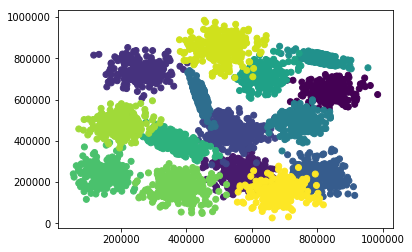

In [2]:
points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))

plt.scatter(points[:,0], points[:,1], c=labels)
plt.show()

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *adjusted mutual information*.

For each algorithm **your task** is to
1. **(4 pt.)** Try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`; **use these parameters hereafter**;
2. **(4 pt.)** Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
3. **(3 pt.)** For each number of clusters **vizualize the clustering result**, calculate the **clustering metrics** and plot them;

<span style="color:green">**Bonus**</span>
You get extra **+4 pt.** if you produce all your plots in one place and make as few
visualizations as possible (counting subplots). This means that you should depict the
comparison in a clear and comprehensible, yet concise manner.

**HINT** <span style="/*color:white;*/" title="select all">If plots cloud somehow overlay
one another and not sit side by side or in different cells...</span>

D:\Programs\Anaconda3\envs\py36\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5,0,'Sil: -0.5750891497712526 MI: -0.0002519735432284359')

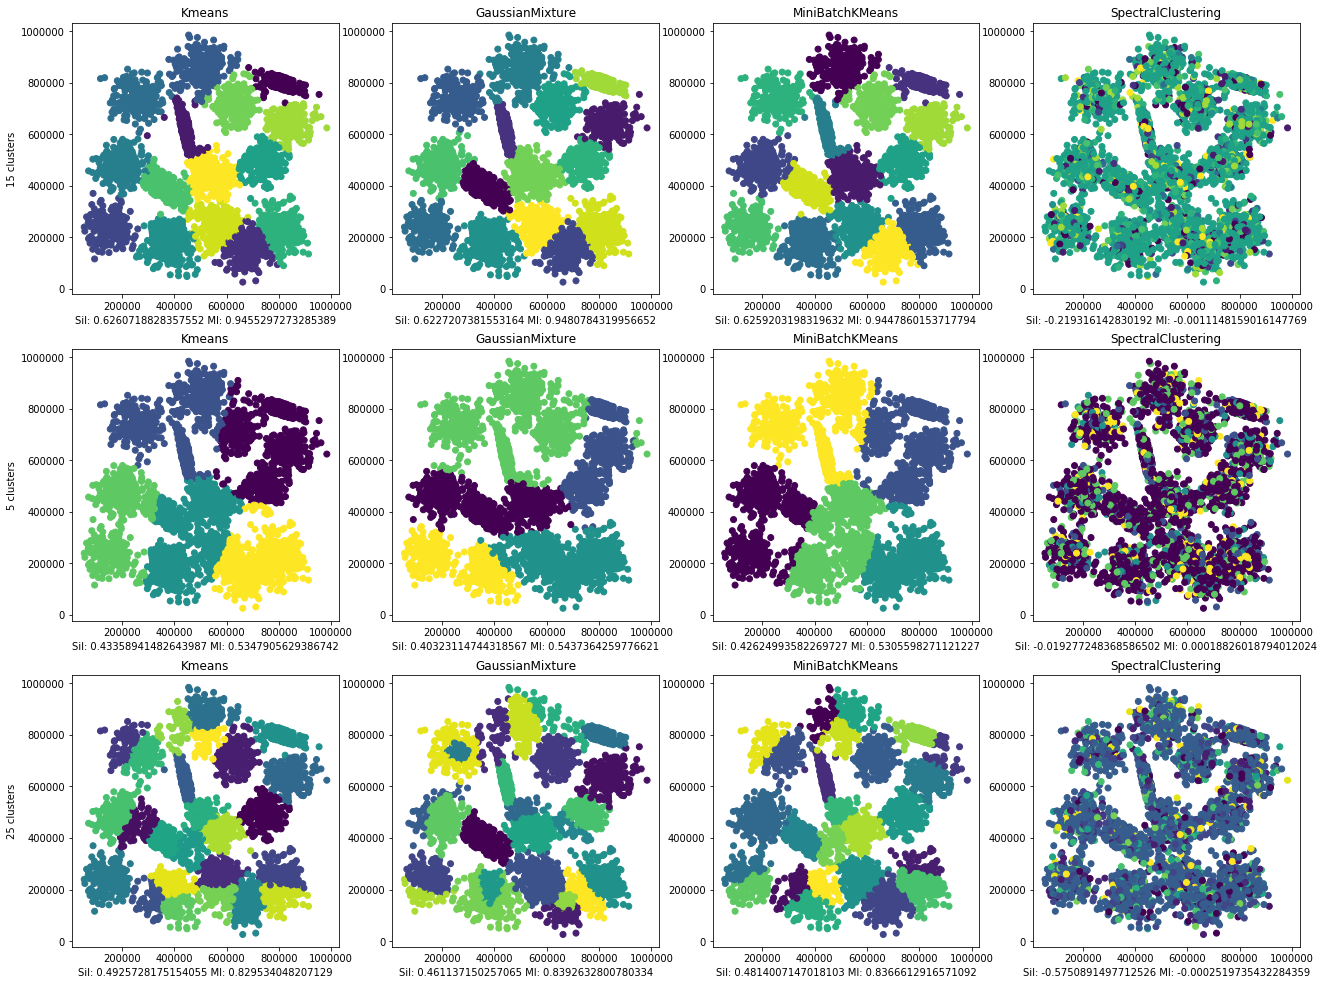

In [3]:
### BEGIN Solution
from sklearn import metrics

#CorrectNumber
y_predKM = KMeans(n_clusters=15, random_state=5).fit_predict(points)
y_predGM = GaussianMixture(n_components=15, random_state=5).fit(points).predict(points)
y_predMbkm = MiniBatchKMeans(n_clusters=15, random_state=5).fit_predict(points)
y_predSP = SpectralClustering(n_clusters=15, random_state=5).fit_predict(points)

sil_km = metrics.silhouette_score(points, y_predKM, metric='euclidean')
sil_gm = metrics.silhouette_score(points, y_predGM, metric='euclidean')
sil_Mbkm = metrics.silhouette_score(points, y_predMbkm, metric='euclidean')
sil_sp = metrics.silhouette_score(points, y_predSP, metric='euclidean')

mi_km = metrics.adjusted_mutual_info_score(labels, y_predKM)
mi_gm = metrics.adjusted_mutual_info_score(labels, y_predGM)
mi_Mbkm = metrics.adjusted_mutual_info_score(labels, y_predMbkm)
mi_sp = metrics.adjusted_mutual_info_score(labels, y_predSP)

#PLOT
f, ((ax11,ax12,ax13,ax14),(ax21,ax22,ax23,ax24),(ax31,ax32,ax33,ax34)) = plt.subplots(3,4,figsize=(22,17))

ax11.set_title("Kmeans")
ax11.scatter(points[:, 0], points[:, 1], c=y_predKM)
ax11.set_ylabel("15 clusters")
ax11.set_xlabel("Sil: "+str(sil_km)+" MI: "+str(mi_km))


ax12.set_title("GaussianMixture")
ax12.scatter(points[:, 0], points[:, 1], c=y_predGM)
ax12.set_xlabel("Sil: "+str(sil_gm)+" MI: "+str(mi_gm))

ax13.set_title("MiniBatchKMeans")
ax13.scatter(points[:, 0], points[:, 1], c=y_predMbkm)
ax13.set_xlabel("Sil: "+str(sil_Mbkm)+" MI: "+str(mi_Mbkm))

ax14.set_title("SpectralClustering")
ax14.scatter(points[:, 0], points[:, 1], c=y_predSP)
ax14.set_xlabel("Sil: "+str(sil_sp)+" MI: "+str(mi_sp))

#Low Number of clusters
y_predKM = KMeans(n_clusters=5, random_state=5).fit_predict(points)
y_predGM = GaussianMixture(n_components=5, random_state=5).fit(points).predict(points)
y_predMbkm = MiniBatchKMeans(n_clusters=5, random_state=5).fit_predict(points)
y_predSP = SpectralClustering(n_clusters=5, random_state=5).fit_predict(points)

sil_km = metrics.silhouette_score(points, y_predKM, metric='euclidean')
sil_gm = metrics.silhouette_score(points, y_predGM, metric='euclidean')
sil_Mbkm = metrics.silhouette_score(points, y_predMbkm, metric='euclidean')
sil_sp = metrics.silhouette_score(points, y_predSP, metric='euclidean')

mi_km = metrics.adjusted_mutual_info_score(labels, y_predKM)
mi_gm = metrics.adjusted_mutual_info_score(labels, y_predGM)
mi_Mbkm = metrics.adjusted_mutual_info_score(labels, y_predMbkm)
mi_sp = metrics.adjusted_mutual_info_score(labels, y_predSP)


#PLOT
ax21.set_title("Kmeans")
ax21.scatter(points[:, 0], points[:, 1], c=y_predKM)
ax21.set_ylabel("5 clusters")
ax21.set_xlabel("Sil: "+str(sil_km)+" MI: "+str(mi_km))


ax22.set_title("GaussianMixture")
ax22.scatter(points[:, 0], points[:, 1], c=y_predGM)
ax22.set_xlabel("Sil: "+str(sil_gm)+" MI: "+str(mi_gm))

ax23.set_title("MiniBatchKMeans")
ax23.scatter(points[:, 0], points[:, 1], c=y_predMbkm)
ax23.set_xlabel("Sil: "+str(sil_Mbkm)+" MI: "+str(mi_Mbkm))

ax24.set_title("SpectralClustering")
ax24.scatter(points[:, 0], points[:, 1], c=y_predSP)
ax24.set_xlabel("Sil: "+str(sil_sp)+" MI: "+str(mi_sp))


#High Number of clusters
y_predKM = KMeans(n_clusters=25, random_state=5).fit_predict(points)
y_predGM = GaussianMixture(n_components=25, random_state=5).fit(points).predict(points)
y_predMbkm = MiniBatchKMeans(n_clusters=25, random_state=5).fit_predict(points)
y_predSP = SpectralClustering(n_clusters=25, random_state=5).fit_predict(points)

sil_km = metrics.silhouette_score(points, y_predKM, metric='euclidean')
sil_gm = metrics.silhouette_score(points, y_predGM, metric='euclidean')
sil_Mbkm = metrics.silhouette_score(points, y_predMbkm, metric='euclidean')
sil_sp = metrics.silhouette_score(points, y_predSP, metric='euclidean')

mi_km = metrics.adjusted_mutual_info_score(labels, y_predKM)
mi_gm = metrics.adjusted_mutual_info_score(labels, y_predGM)
mi_Mbkm = metrics.adjusted_mutual_info_score(labels, y_predMbkm)
mi_sp = metrics.adjusted_mutual_info_score(labels, y_predSP)

#PLOT
ax31.set_title("Kmeans")
ax31.scatter(points[:, 0], points[:, 1], c=y_predKM)
ax31.set_ylabel("25 clusters")
ax31.set_xlabel("Sil: "+str(sil_km)+" MI: "+str(mi_km))


ax32.set_title("GaussianMixture")
ax32.scatter(points[:, 0], points[:, 1], c=y_predGM)
ax32.set_xlabel("Sil: "+str(sil_gm)+" MI: "+str(mi_gm))

ax33.set_title("MiniBatchKMeans")
ax33.scatter(points[:, 0], points[:, 1], c=y_predMbkm)
ax33.set_xlabel("Sil: "+str(sil_Mbkm)+" MI: "+str(mi_Mbkm))

ax34.set_title("SpectralClustering")
ax34.scatter(points[:, 0], points[:, 1], c=y_predSP)
ax34.set_xlabel("Sil: "+str(sil_sp)+" MI: "+str(mi_sp))


### END Solution

<br/> <!--Intentionally left blank-->

## Task 2 (8 + 6 pt.): Finding the Number of Clusters with Bootstrap

For a chosen algorithm find the best number of clusters using bootstrap.

So first based on your observations made at previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**. Justify your choice. **(1 pt.)**

**BEGIN Solution**

Spectral clustering produces very noisy structure, so it is inappropriate. Kmeans and miniBatch KMeans are very geometrically sensitive. Therefore it is better to use Gaussian mixtures, with this we successfuly can derive clusters of number close to the original one. If we go far from it, then either silhouette coefficient or MI will suffer.

**END Solution**

**Your task** is to
1. **(2 pt.)** For each bootstrap sample perform clusterization and calculate **silhouette score**;
2. **(3 pt.)** Estimate variance of the metric and construct normal 95% **confidence intervals**;
3. **(2 pt.)** **Plot the metric** with the corresponding confidence intervals and chose the best number of clusters.

**Bonus** You may get extra **+2 pt.** if **in addition to** the silhouette score you use
**another metric** and **justify your choice of the algorithm**.
If you choose the [Gap statistic](https://web.stanford.edu/~hastie/Papers/gap.pdf),
*correctly implement and apply* it, you get extra **+4 pt.**.

In [4]:
from tqdm import tqdm_notebook

### BEGIN Solution

cluster_ns = np.arange(5,25)
sample_number = 100



#Optimize weighted sum  1/2 Sil + 1/2 MI
bestScore = -20
bestScoreSil = -20

myMetricMeans=np.zeros(cluster_ns.shape[0])
myMetricStds=np.zeros(cluster_ns.shape[0])
silMetricMeans=np.zeros(cluster_ns.shape[0])
silMetricStds=np.zeros(cluster_ns.shape[0])

for i_cn, n_clusters in tqdm_notebook(enumerate(cluster_ns)):
    # >>> your code here <<<
    myMetrics=np.zeros(sample_number)
    silMetrics=np.zeros(sample_number)
    for sample_index in tqdm_notebook(range(sample_number)):
        
        idx = np.random.choice(range(points.shape[0]), points.shape[0], replace=True)
        
        y_predGM = GaussianMixture(n_components=n_clusters, random_state=5).fit(points[idx,:]).predict(points[idx,:])
        sil_gm = metrics.silhouette_score(points[idx,:], y_predGM, metric='euclidean')
        mi_gm = metrics.adjusted_mutual_info_score(labels[idx], y_predGM)
        
        silMetrics[sample_index]=sil_gm
        myMetrics[sample_index]=sil_gm*0.5 + mi_gm*0.5
    
    myMetricMean = np.mean(myMetrics)
    myMetricStd = np.std(myMetrics)
    
    silMetricMean = np.mean(silMetrics)
    silMetricStd = np.std(silMetrics)
    
    if(myMetricMean > bestScore):
            bestScore=myMetricMean
            bestNumber=n_clusters
            
    if(silMetricMean > bestScoreSil):
            bestScoreSil=silMetricMean
            bestNumberSil=n_clusters

    myMetricMeans[i_cn]=myMetricMean
    myMetricStds[i_cn]=myMetricStd
    
    silMetricMeans[i_cn]=silMetricMean
    silMetricStds[i_cn]=silMetricStd
        

# >>> your code here <<<


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

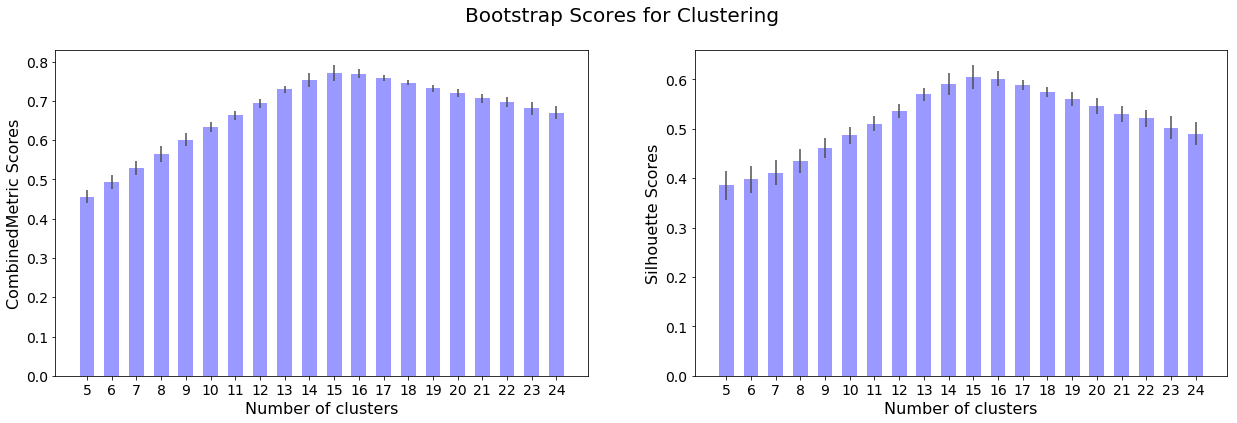

In [34]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(21,6))

index = cluster_ns
bar_width = 0.6

opacity = 0.4
error_config = {'ecolor': '0.3'}

ax1.bar(index, myMetricMeans, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=myMetricStds,
                 error_kw=error_config)


ax1.set_xlabel('Number of clusters',fontsize=16)
ax1.set_ylabel('CombinedMetric Scores',fontsize=16)
f.suptitle('Bootstrap Scores for Clustering',fontsize=20)
ticks=ax1.set_xticks(index) #to silence the output
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2.bar(index, silMetricMeans, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=silMetricStds,
                 error_kw=error_config)


ax2.set_xlabel('Number of clusters',fontsize=16)
ax2.set_ylabel('Silhouette Scores',fontsize=16)
ticks=ax2.set_xticks(index) #to silence the output
ax2.tick_params(axis='both', which='major', labelsize=14)

### END Solution

The interesting thing is that both metrics suggest to choose 15 as optimal number of clusters, however silhouette selector is more uncertain about that. Anyway, the optimum for number of clusters will be nearby 15 if we use combined metrics or silhouette coefficient for model selection.

<br/> <!--Intentionally left blank-->